In [1]:
import mne 
import mne_nirs
import numpy as np

from itertools import compress

In [2]:
mne.viz.set_3d_backend("pyvistaqt")
%matplotlib inline

Using pyvistaqt 3d backend.


# How to load NIRx data

In [3]:
import os
import matplotlib.pyplot as plt

In [4]:
fnirs_data_folder = mne.datasets.fnirs_motor.data_path("./")
fnirs_data_folder

PosixPath('MNE-fNIRS-motor-data')

In [5]:
file_name = "./MNE-fNIRS-motor-data/Participant-1"

In [6]:
# Load the NIRx data
raw_intensity = mne.io.read_raw_nirx(file_name, verbose=True, preload=True)

Loading ./MNE-fNIRS-motor-data/Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


In [7]:
raw_intensity

<RawNIRX | Participant-1, 56 x 23239 (2974.6 s), ~10.0 MiB, data loaded>

In [8]:
print(raw_intensity.info["subject_info"])

print(raw_intensity.get_data())

print(raw_intensity.get_data().shape)

print(raw_intensity.ch_names)

print(raw_intensity.times)


<subject_info | his_id: P1, first_name: P1, sex: 1 (FIFFV_SUBJ_SEX_MALE), birthday: 1985-11-02>
[[0.0913686 0.0909875 0.0910225 ... 0.0941083 0.0940129 0.0944882]
 [0.1856806 0.186377  0.1836514 ... 0.1856486 0.1850836 0.1842172]
 [0.227516  0.2297024 0.2261366 ... 0.2264519 0.2271665 0.226713 ]
 ...
 [0.8457658 0.825988  0.8259648 ... 0.975894  0.9756599 0.9826459]
 [0.6304559 0.6284427 0.6287045 ... 0.6810626 0.6809573 0.6818709]
 [1.2285622 1.2205907 1.2190002 ... 1.2729124 1.2727222 1.2755645]]
(56, 23239)
['S1_D1 760', 'S1_D1 850', 'S1_D2 760', 'S1_D2 850', 'S1_D3 760', 'S1_D3 850', 'S1_D9 760', 'S1_D9 850', 'S2_D1 760', 'S2_D1 850', 'S2_D3 760', 'S2_D3 850', 'S2_D4 760', 'S2_D4 850', 'S2_D10 760', 'S2_D10 850', 'S3_D2 760', 'S3_D2 850', 'S3_D3 760', 'S3_D3 850', 'S3_D11 760', 'S3_D11 850', 'S4_D3 760', 'S4_D3 850', 'S4_D4 760', 'S4_D4 850', 'S4_D12 760', 'S4_D12 850', 'S5_D5 760', 'S5_D5 850', 'S5_D6 760', 'S5_D6 850', 'S5_D7 760', 'S5_D7 850', 'S5_D13 760', 'S5_D13 850', 'S6_D5 

# View the data

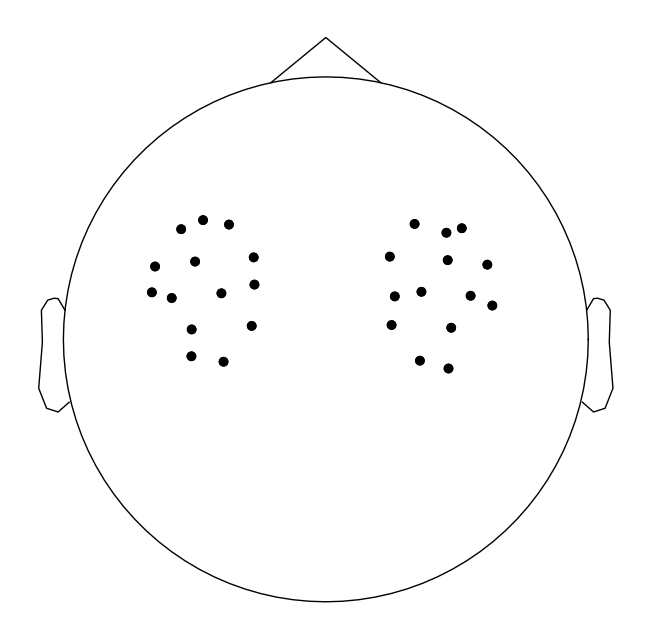

In [9]:
raw_intensity.plot_sensors();

In [10]:
# KEEPS CRASHING AFTER POP-UP APPEARS

# mne.viz.set_3d_backend("pyvistaqt")

# subjects_dir = mne.datasets.sample.data_path("./") / 'subjects'


# fig = mne.viz.create_3d_figure(size=(800,600), bgcolor='white')

# mne.viz.plot_alignment(raw_intensity.info, show_axes=True,
#                        subject='fsaverage', coord_frame='mri',
#                        trans='fsaverage', surfaces=['brain'],
#                        fnirs=['channels', 'pairs', 'sources', 'detectors'],
#                        subjects_dir=subjects_dir, fig=fig)

# Alternative Loading Data

In [11]:
from mne_bids import BIDSPath, read_raw_bids
from mne_nirs.datasets import fnirs_motor_group

bids_path = BIDSPath(subject="01", task="tapping",
                    root=fnirs_motor_group.data_path("./"),
                     datatype="nirs", suffix="nirs", extension=".snirf")
raw_intensity = read_raw_bids(bids_path=bids_path, verbose=False)

Using matplotlib as 2D backend.


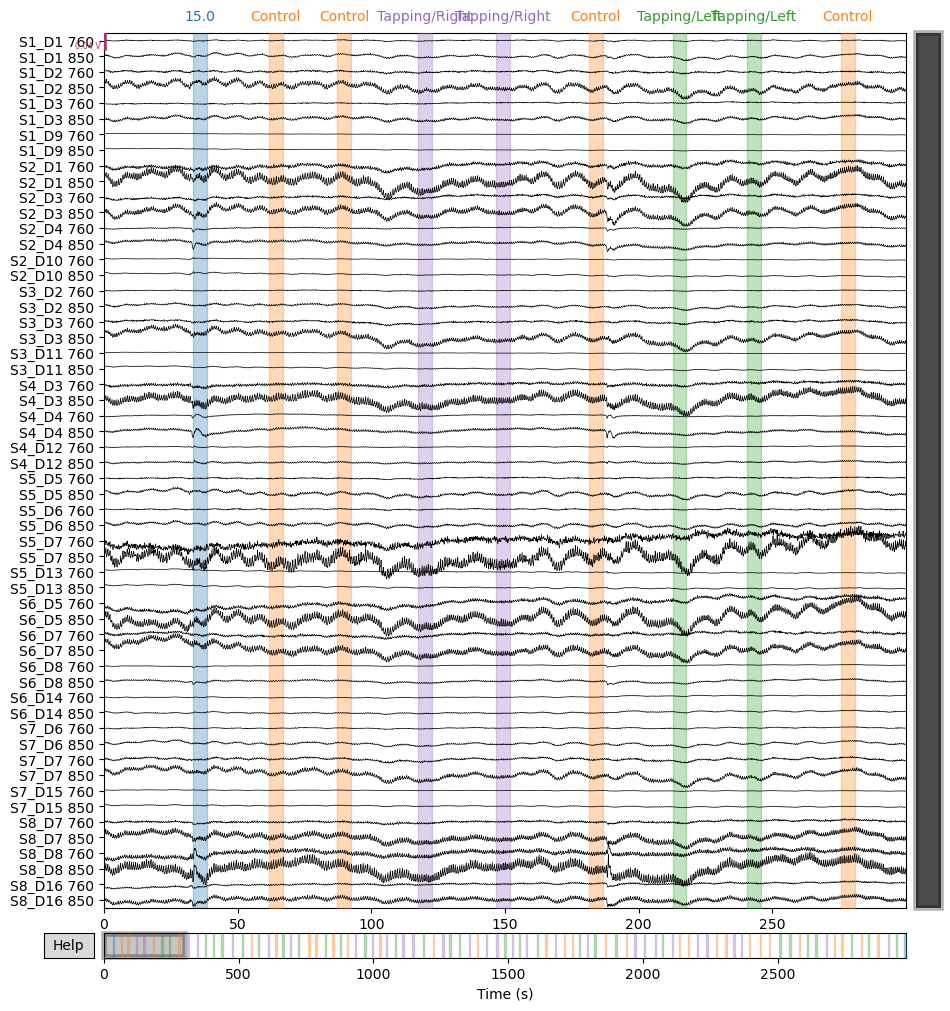

In [12]:
# %matplotlib qt

plt.rcParams["figure.figsize"] = (10, 10)
raw_intensity.plot(duration=300, n_channels=len(raw_intensity.ch_names));

# How to manipulate data 

In [13]:
%matplotlib inline
raw = raw_intensity.copy()

In [14]:
raw

<RawSNIRF | sub-01_task-tapping_nirs.snirf, 56 x 23239 (2974.6 s), ~58 KiB, data not loaded>

In [15]:
raw.resample(2)

<RawSNIRF | sub-01_task-tapping_nirs.snirf, 56 x 5949 (2974.5 s), ~2.6 MiB, data loaded>

In [16]:
raw_intensity.annotations

<Annotations | 92 segments: 15.0 (2), Control (30), Tapping/Left (30), ...>

In [17]:
raw_intensity.annotations.to_data_frame()

,onset,duration,description
0,2020-01-01 13:16:49.408,5.0,15.0
1,2020-01-01 13:17:17.824,5.0,Control
2,2020-01-01 13:17:43.296,5.0,Control
3,2020-01-01 13:18:13.632,5.0,Tapping/Right
4,2020-01-01 13:18:42.816,5.0,Tapping/Right
...,...,...,...
87,2020-01-01 14:03:29.408,5.0,Tapping/Left
88,2020-01-01 14:04:05.376,5.0,Control
89,2020-01-01 14:04:44.032,5.0,Tapping/Right
90,2020-01-01 14:05:14.496,5.0,Tapping/Left


<Axes: xlabel='onset', ylabel='description'>

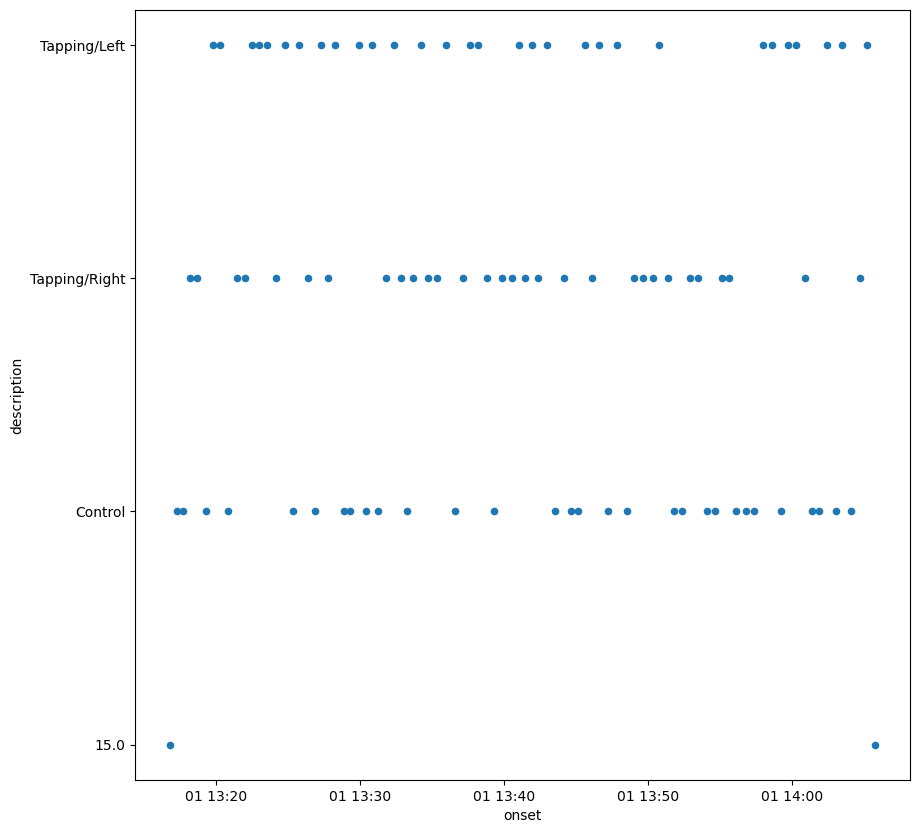

In [18]:
raw_intensity.annotations.to_data_frame().plot.scatter(x='onset', y='description')

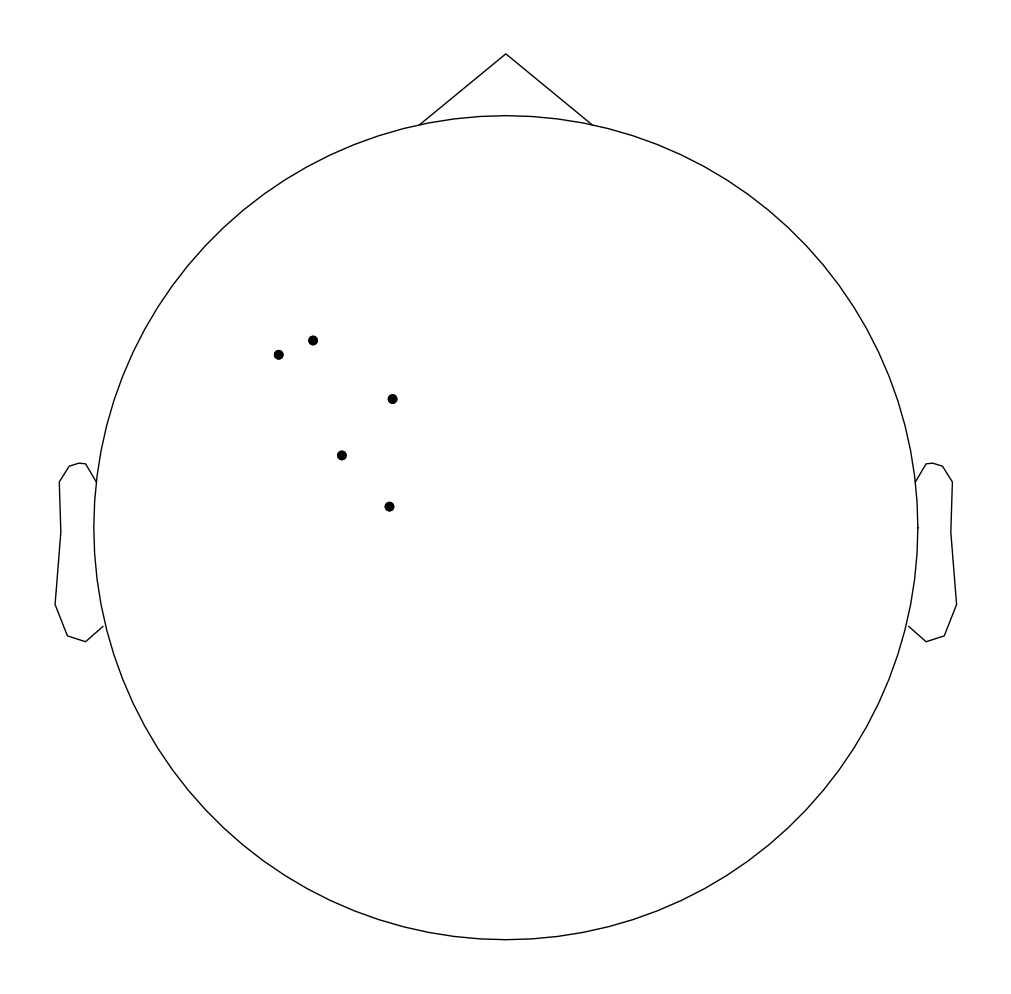

In [19]:
raw.copy().pick(picks=[0, 1, 2, 3, 4, 5, 12, 13, 14, 15]).plot_sensors();

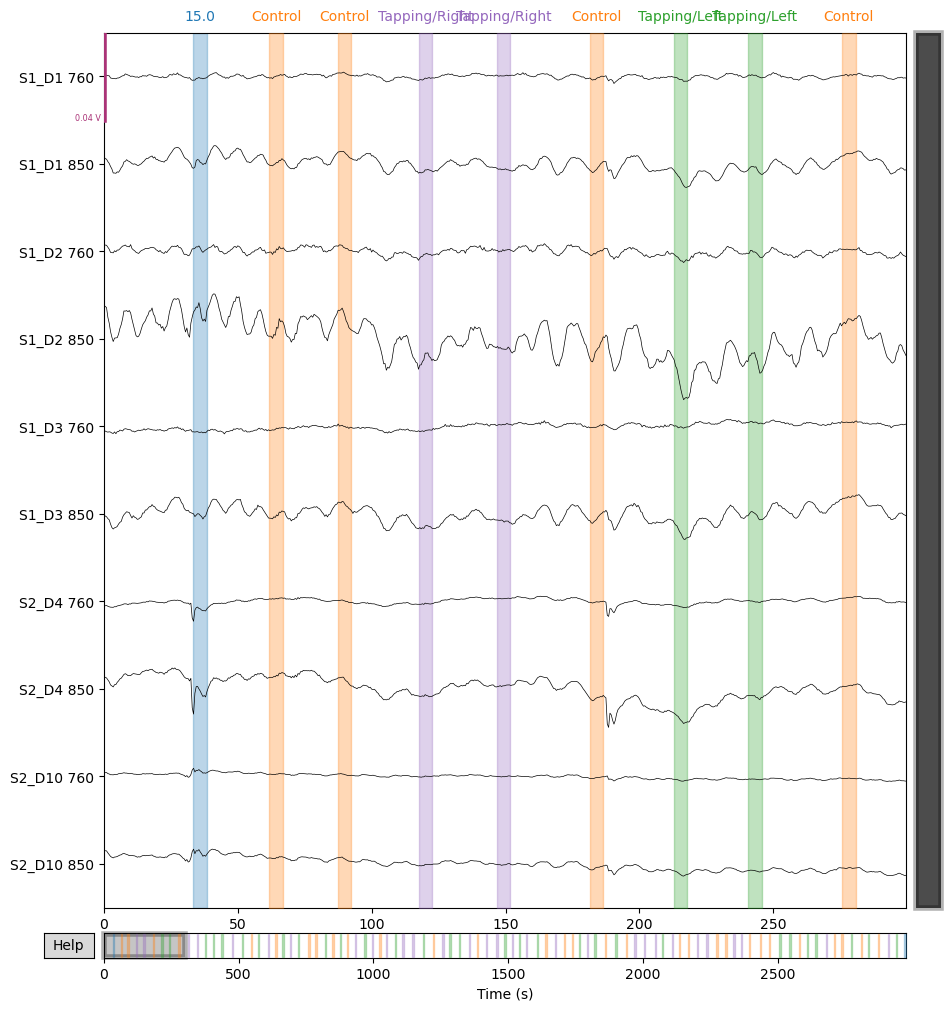

In [20]:
raw.copy().pick(picks=[0, 1, 2, 3, 4, 5, 12, 13, 14, 15]).plot(duration=300);

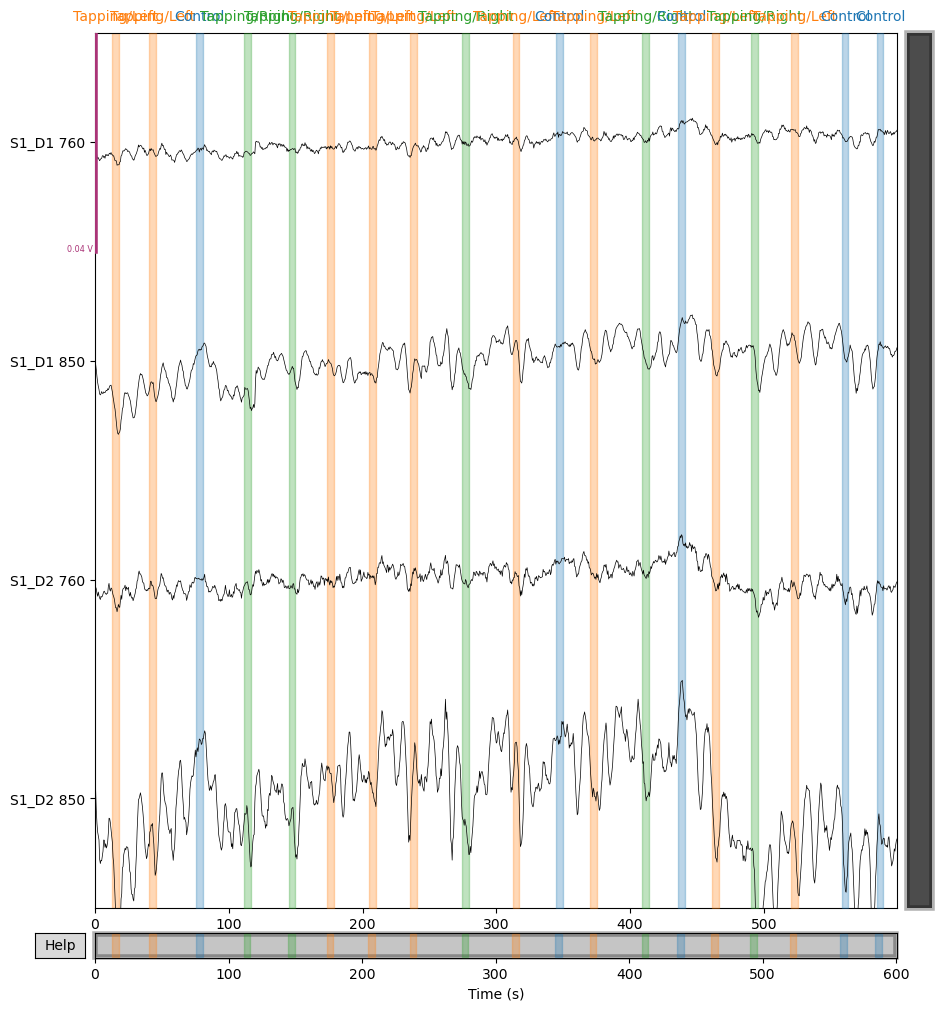

In [21]:
raw.copy().pick(picks=range(4)).crop(tmin=200, tmax=800).plot(duration=3000);

# Signal Processing

In [22]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)

Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


In [23]:
raw_od

<RawSNIRF | sub-01_task-tapping_nirs.snirf, 56 x 23239 (2974.6 s), ~10.0 MiB, data loaded>

In [24]:
raw_od.copy().pick(range(6)).ch_names

['S1_D1 760', 'S1_D1 850', 'S1_D2 760', 'S1_D2 850', 'S1_D3 760', 'S1_D3 850']

In [25]:
from mne.preprocessing.nirs import beer_lambert_law, optical_density

In [26]:
raw_haemo = beer_lambert_law(raw_od)

In [27]:
raw_haemo.copy().pick(range(6)).ch_names

['S1_D1 hbo', 'S1_D1 hbr', 'S1_D2 hbo', 'S1_D2 hbr', 'S1_D3 hbo', 'S1_D3 hbr']

In [28]:
raw_haemo.copy().pick("hbo").ch_names

['S1_D1 hbo',
 'S1_D2 hbo',
 'S1_D3 hbo',
 'S1_D9 hbo',
 'S2_D1 hbo',
 'S2_D3 hbo',
 'S2_D4 hbo',
 'S2_D10 hbo',
 'S3_D2 hbo',
 'S3_D3 hbo',
 'S3_D11 hbo',
 'S4_D3 hbo',
 'S4_D4 hbo',
 'S4_D12 hbo',
 'S5_D5 hbo',
 'S5_D6 hbo',
 'S5_D7 hbo',
 'S5_D13 hbo',
 'S6_D5 hbo',
 'S6_D7 hbo',
 'S6_D8 hbo',
 'S6_D14 hbo',
 'S7_D6 hbo',
 'S7_D7 hbo',
 'S7_D15 hbo',
 'S8_D7 hbo',
 'S8_D8 hbo',
 'S8_D16 hbo']

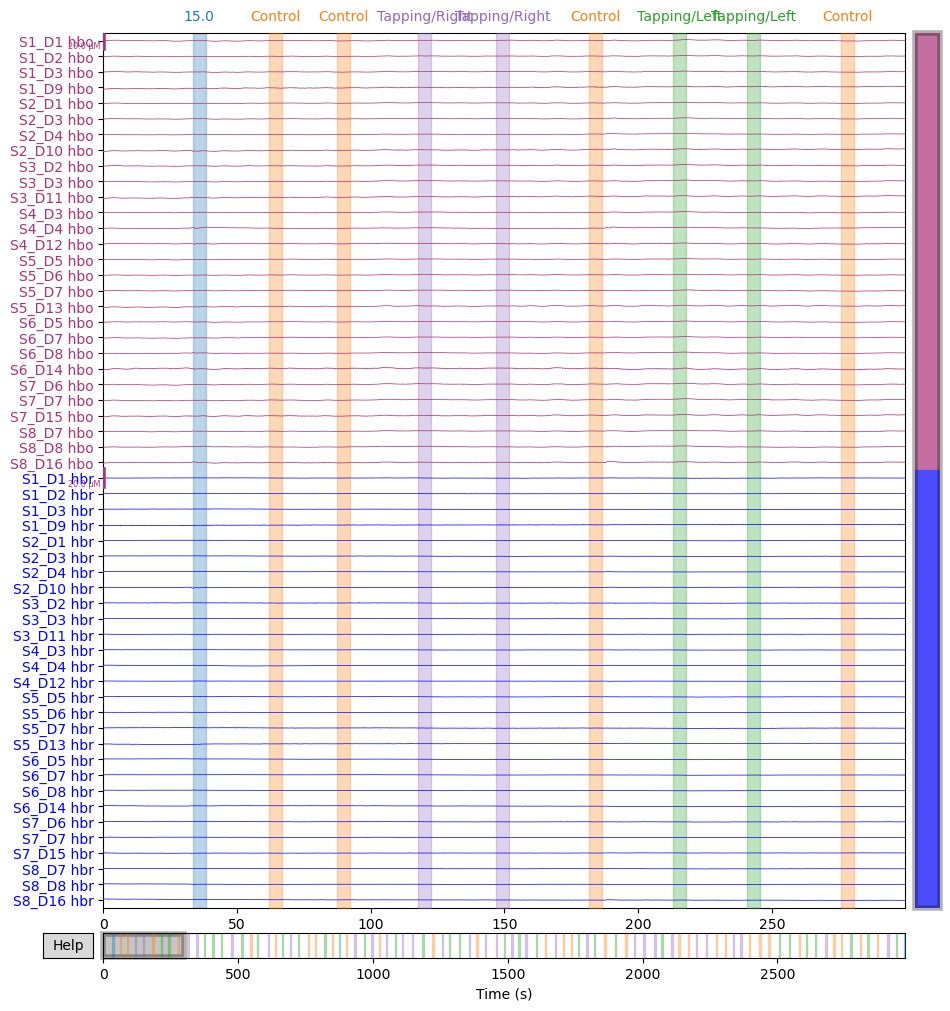

In [29]:
plt.rcParams["figure.figsize"] = (16, 10)
raw_haemo.plot(duration=300, n_channels=len(raw_haemo.ch_names), clipping=None);

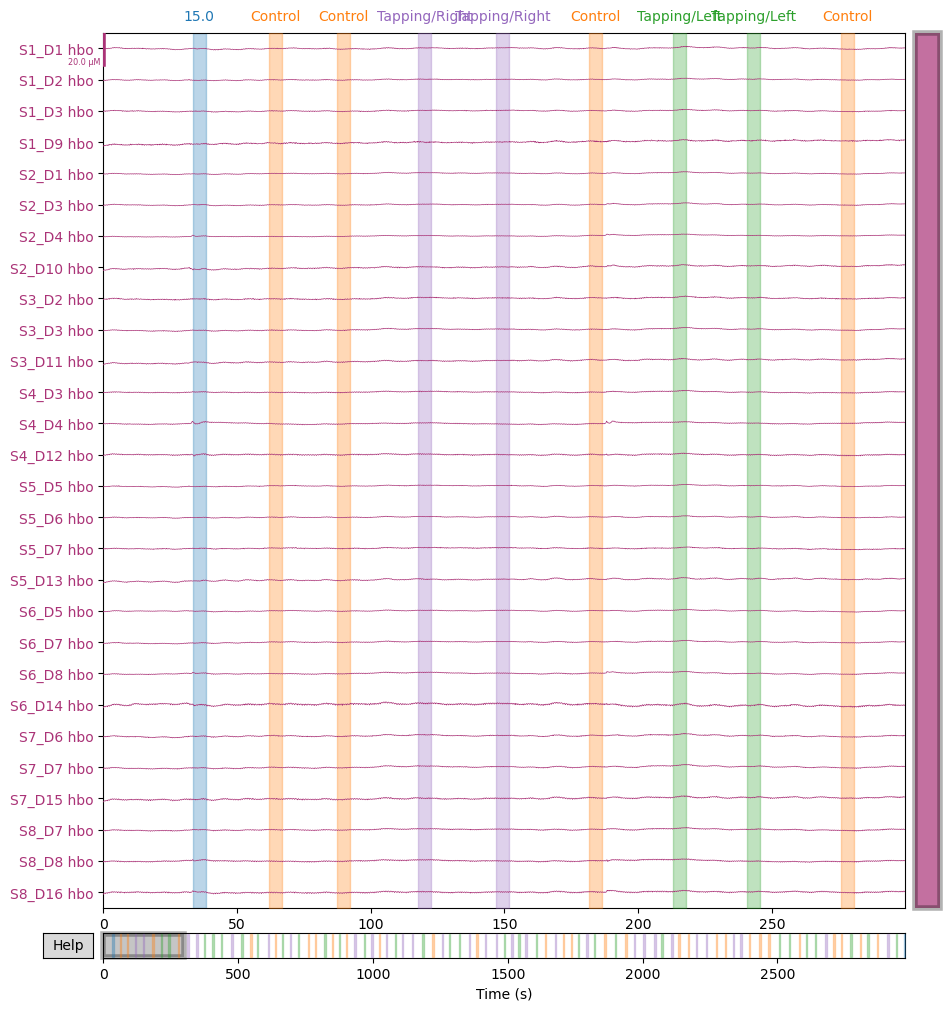

In [30]:
plt.rcParams["figure.figsize"] = (16, 10)
raw_haemo.copy().pick("hbo").plot(duration=300, n_channels=len(raw_haemo.ch_names), clipping=None);

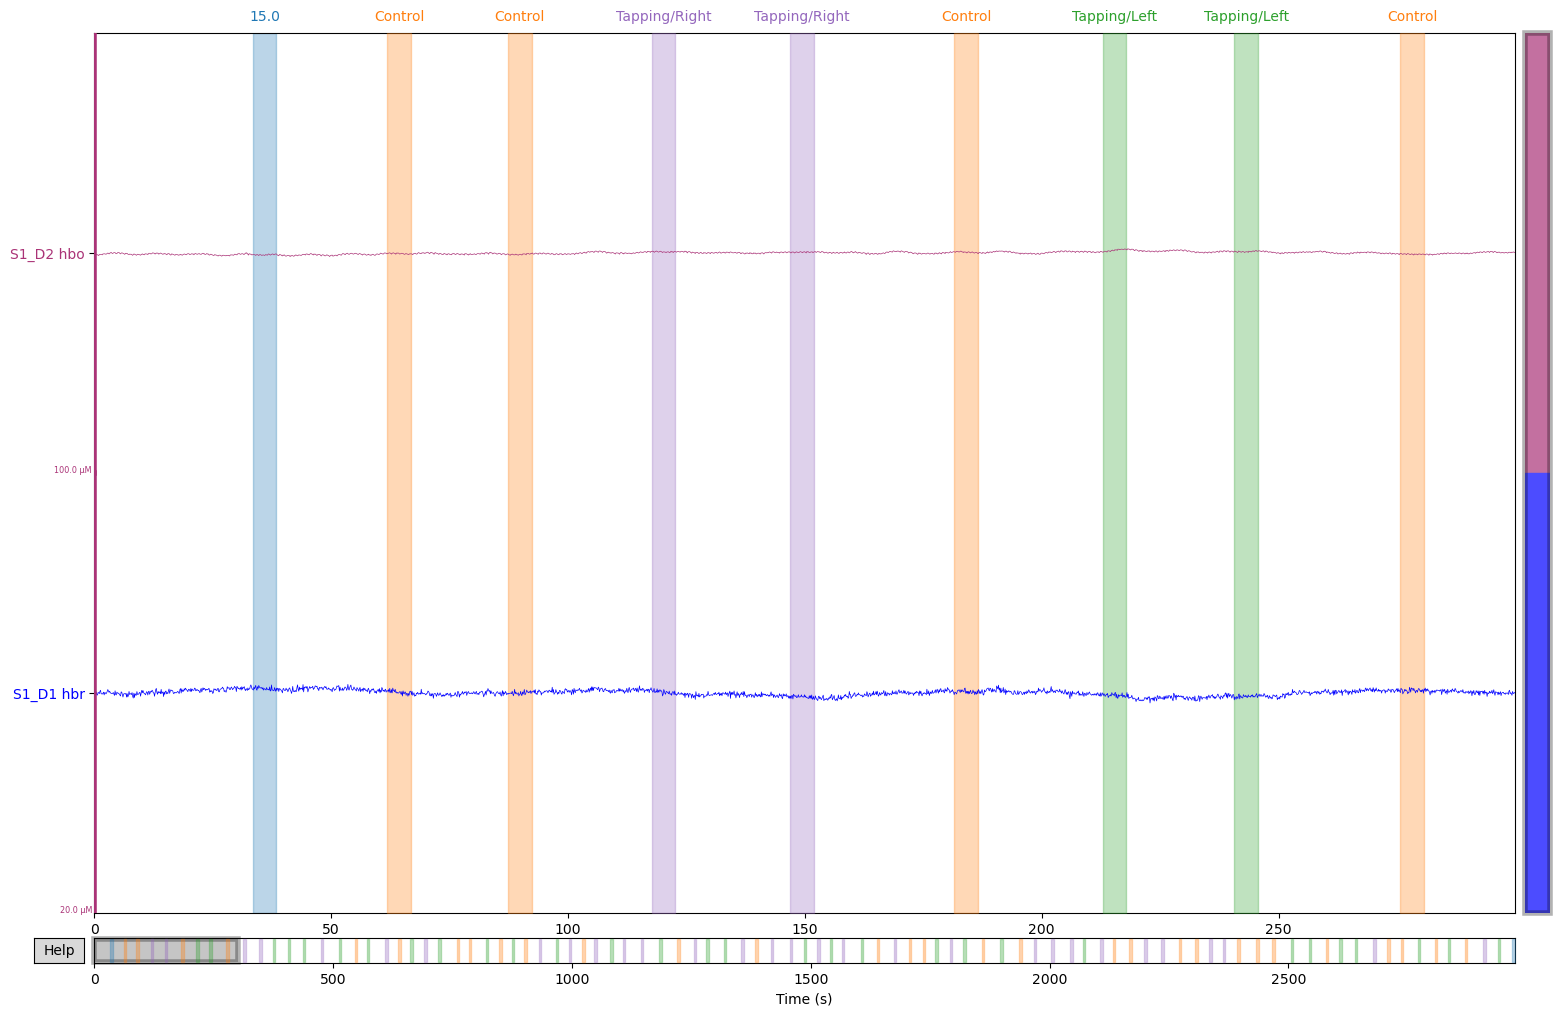

In [31]:
# 1. Assign the plot to a variable (fig) and prevent it from showing immediately
fig = raw_haemo.copy().pick([1,2]).plot(
    duration=300, 
    n_channels=len(raw_haemo.ch_names), 
    clipping=None, 
    scalings=dict(hbo=5e-5),
    show=False  # Important: Don't show the window yet
)

# 2. Manually set the size on the figure object
fig.set_size_inches(16, 10)

# Data Quality check

In [32]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)
sci

array([0.64451388, 0.64451388, 0.82855814, 0.82855814, 0.73965774,
       0.73965774, 0.58274491, 0.58274491, 0.9536225 , 0.9536225 ,
       0.88337935, 0.88337935, 0.98409562, 0.98409562, 0.92169739,
       0.92169739, 0.67823929, 0.67823929, 0.87238821, 0.87238821,
       0.8636861 , 0.8636861 , 0.94439075, 0.94439075, 0.98238431,
       0.98238431, 0.97920112, 0.97920112, 0.61204262, 0.61204262,
       0.77762416, 0.77762416, 0.67654918, 0.67654918, 0.90613474,
       0.90613474, 0.95180484, 0.95180484, 0.93318584, 0.93318584,
       0.97626613, 0.97626613, 0.94300376, 0.94300376, 0.74896185,
       0.74896185, 0.92355509, 0.92355509, 0.9316356 , 0.9316356 ,
       0.93526179, 0.93526179, 0.97442709, 0.97442709, 0.97223285,
       0.97223285])

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

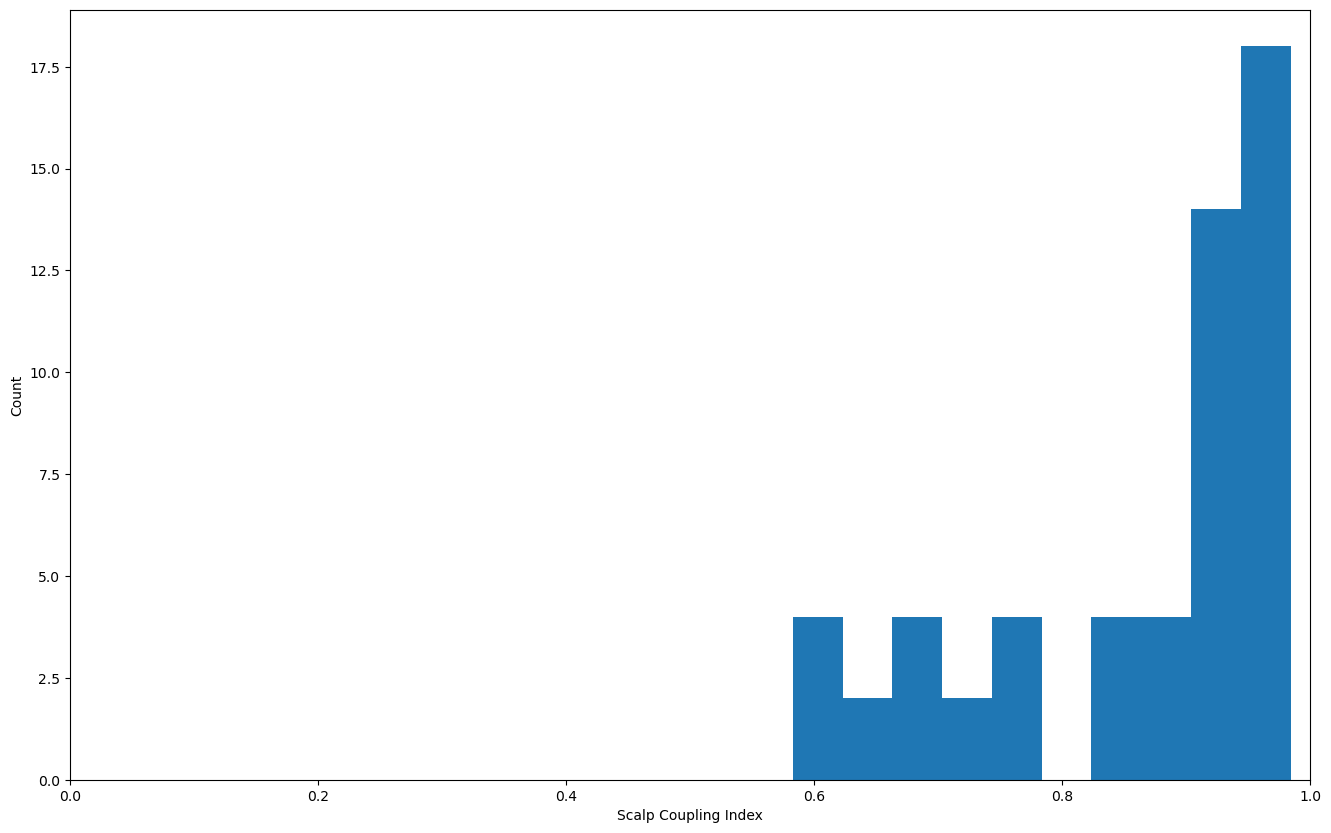

In [33]:
fix, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel="Scalp Coupling Index", ylabel="Count", xlim=[0, 1])

In [34]:
raw_od.info['bads'] = ['S1_D9 760', 'S1_D9 850']

In [35]:
raw_od

<RawSNIRF | sub-01_task-tapping_nirs.snirf, 56 x 23239 (2974.6 s), ~10.0 MiB, data loaded>

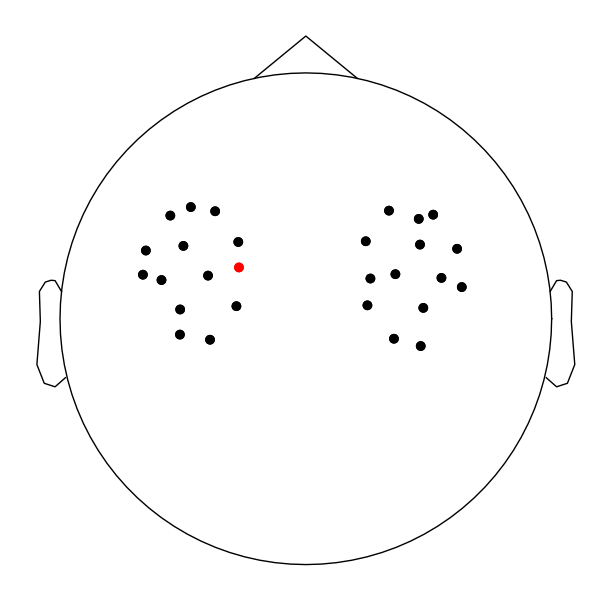

In [36]:
plt.rcParams["figure.figsize"] = (6,6)
raw_od.plot_sensors();

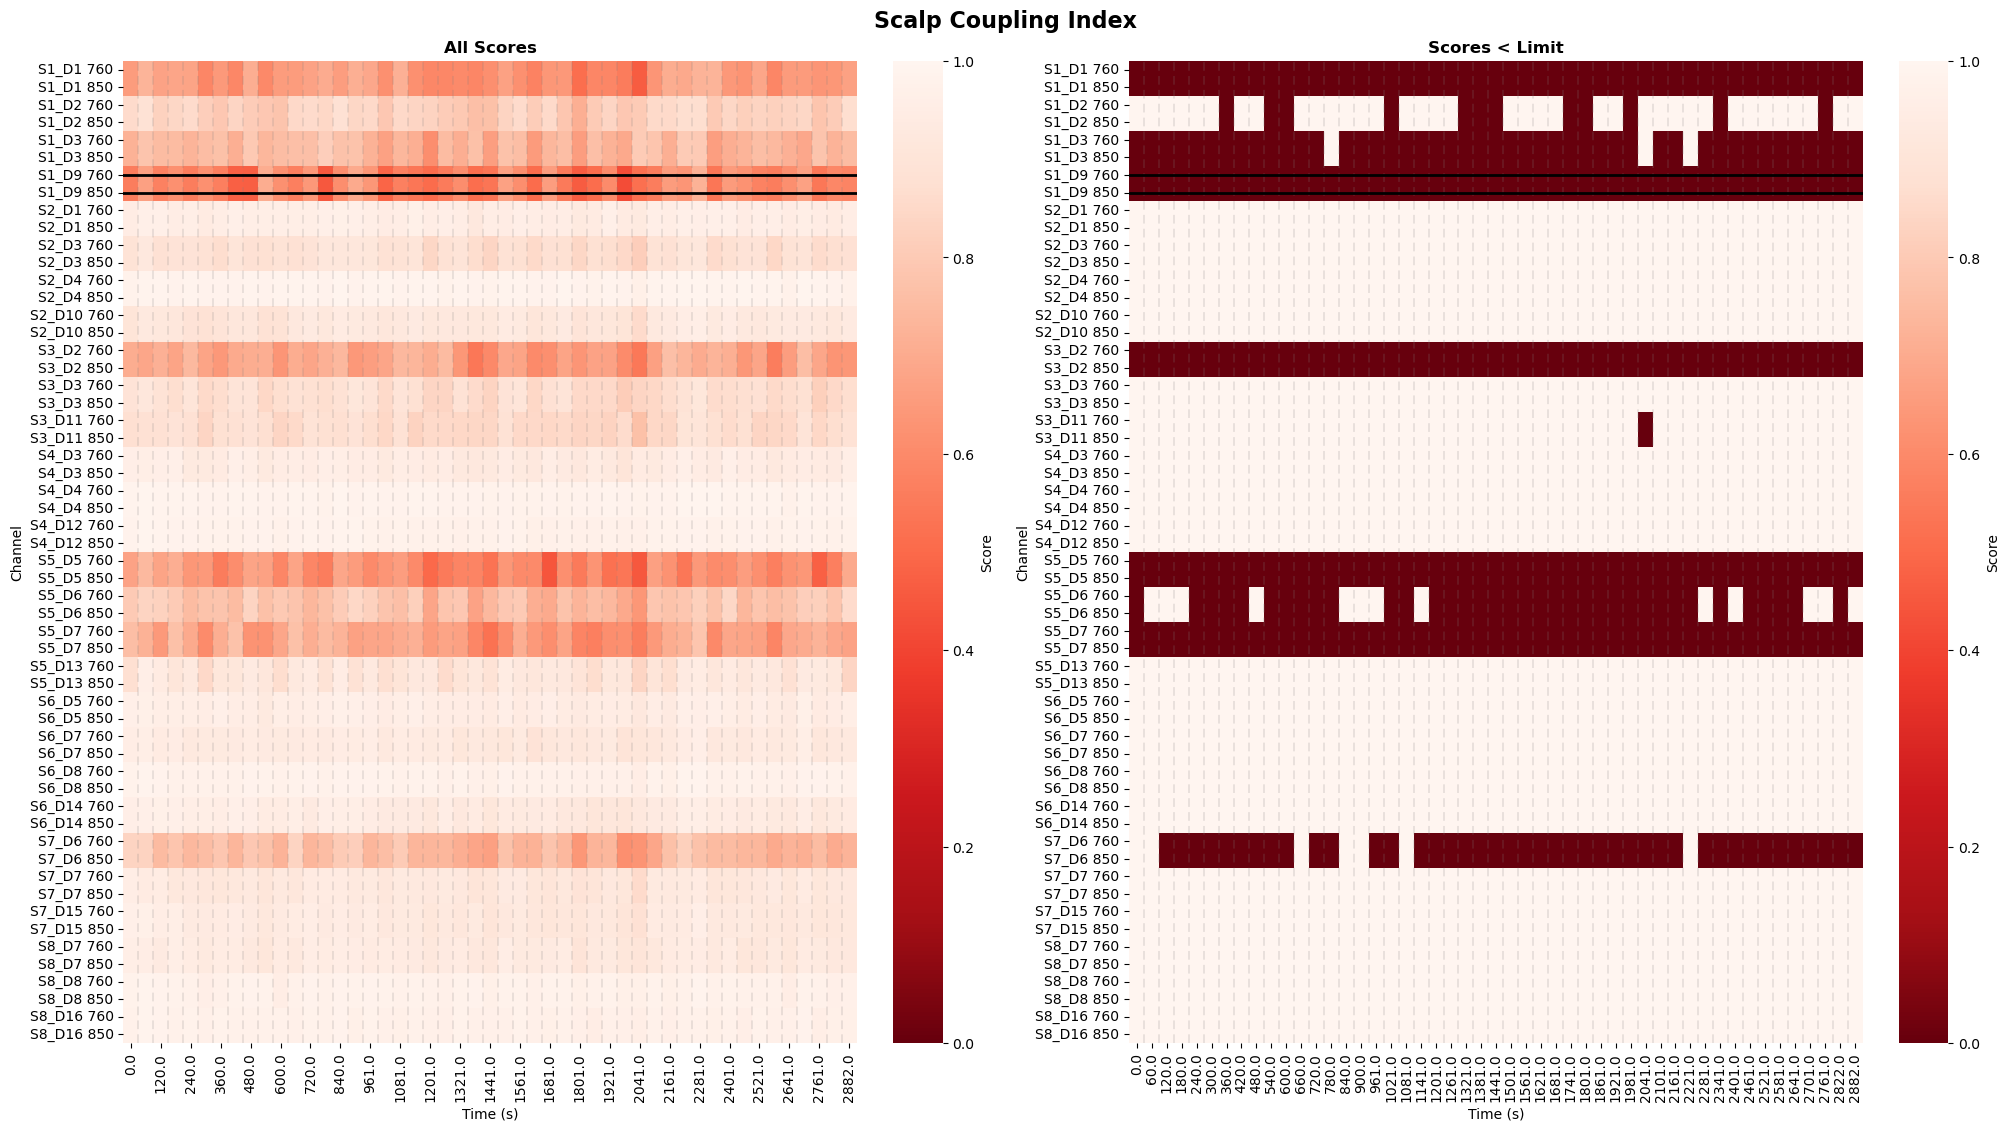

In [37]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od.copy().crop(tmax=30))

from mne_nirs.preprocessing import peak_power, scalp_coupling_index_windowed
from mne_nirs.visualisation import plot_timechannel_quality_metric

_, scores, times = scalp_coupling_index_windowed(raw_od, time_window=60)
plot_timechannel_quality_metric(raw_od, scores, times, threshold=0.8, title="Scalp Coupling Index");

# Waveform Analysis

## Preprocessing

In [38]:
raw_intensity = read_raw_bids(bids_path=bids_path, verbose=False)

raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)

Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


In [39]:
raw_haemo = mne_nirs.channels.get_long_channels(raw_haemo)

In [40]:
raw_haemo

<RawSNIRF | sub-01_task-tapping_nirs.snirf, 40 x 23239 (2974.6 s), ~7.1 MiB, data loaded>

Effective window size : 262.144 (s)
Plotting power spectral density (dB=True).


/nix/store/0imsm4si346myfsbh8al7ijv7jk27q2v-python3-3.13.11-env/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


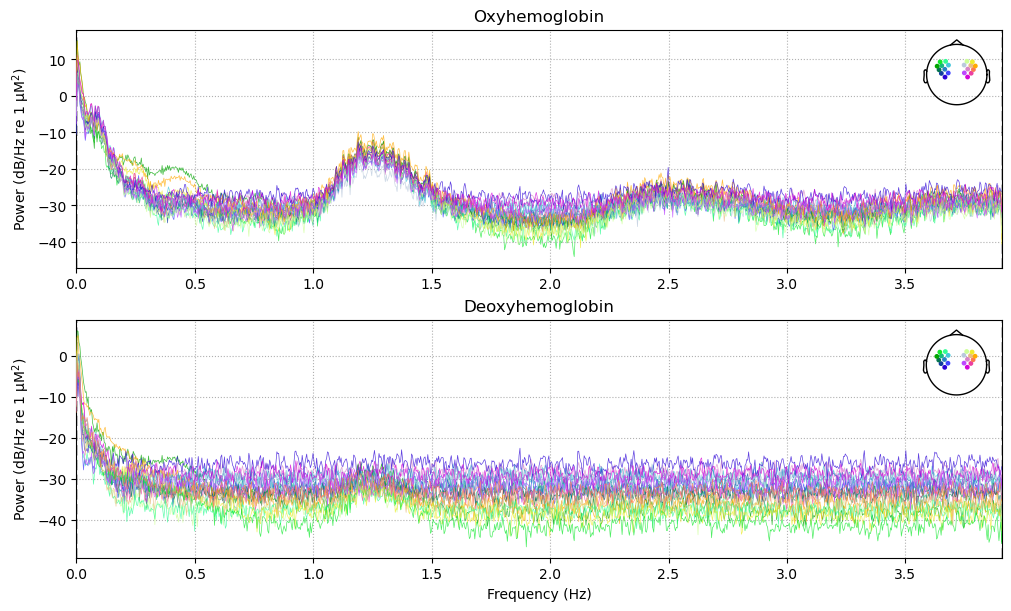

In [41]:
raw_haemo.compute_psd().plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 262.144 (s)
Plotting power spectral density (dB=True).


/nix/store/0imsm4si346myfsbh8al7ijv7jk27q2v-python3-3.13.11-env/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


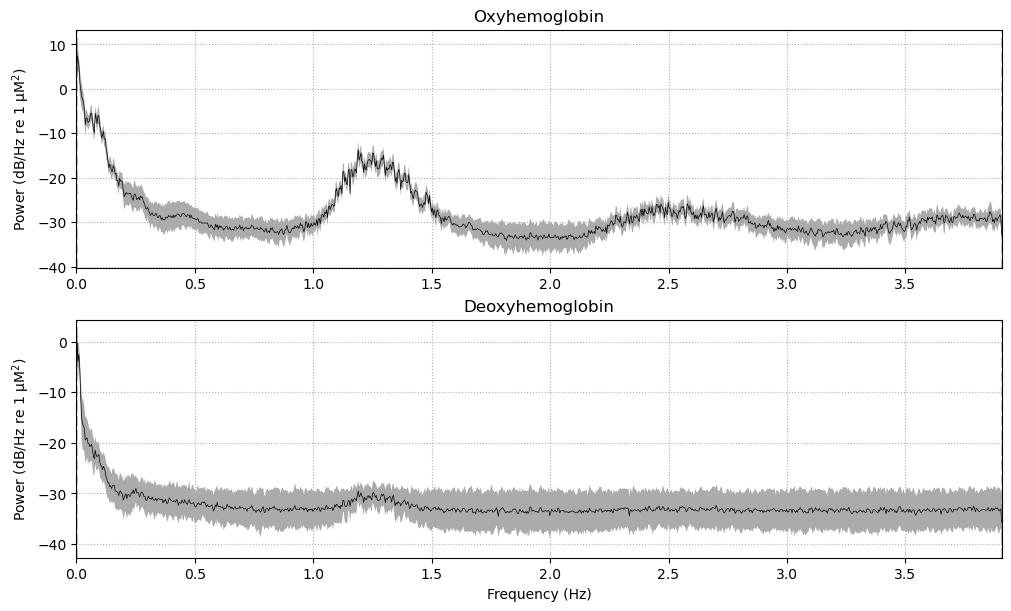

In [42]:
raw_haemo.plot_psd(average=True);


In [43]:
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2, l_trans_bandwidth=0.02)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1291 samples (165.248 s)



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 262.144 (s)
Plotting power spectral density (dB=True).


/nix/store/0imsm4si346myfsbh8al7ijv7jk27q2v-python3-3.13.11-env/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


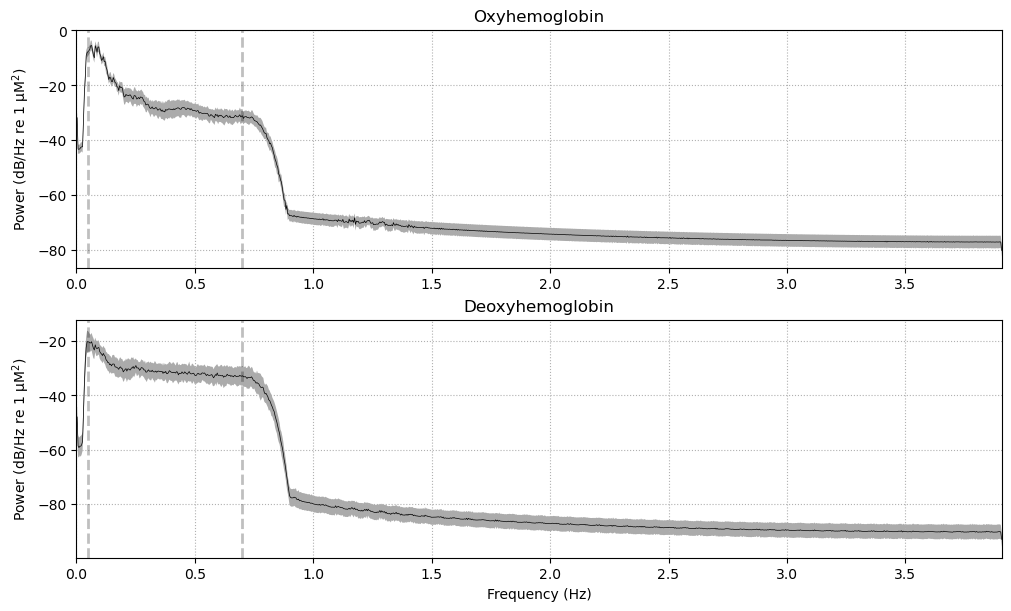

In [44]:
raw_haemo.plot_psd(average=True);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 262.144 (s)
Plotting power spectral density (dB=True).


/nix/store/0imsm4si346myfsbh8al7ijv7jk27q2v-python3-3.13.11-env/lib/python3.13/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


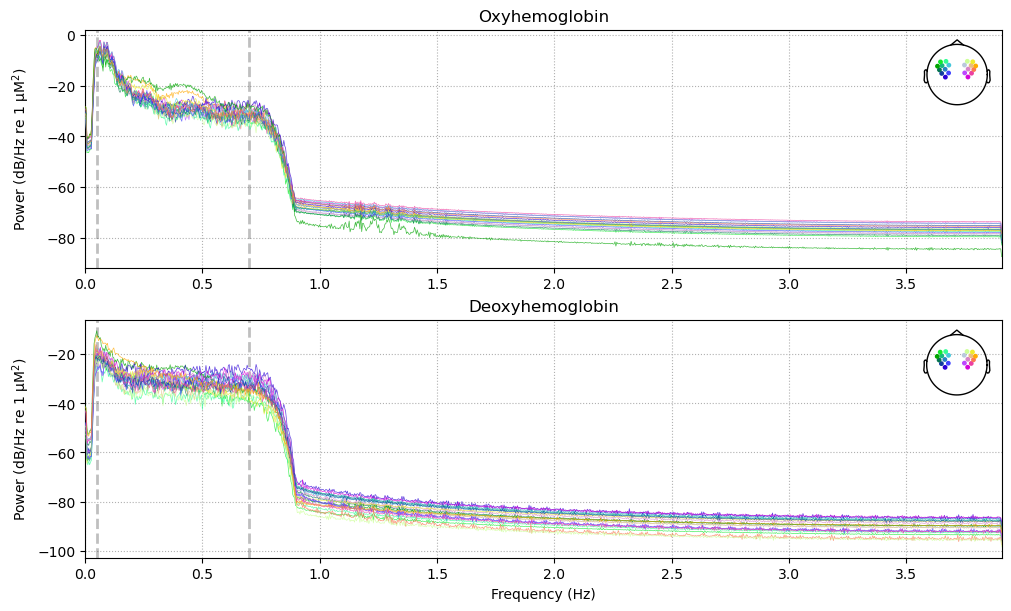

In [45]:
raw_haemo.plot_psd();

## Epoching

In [46]:
events, event_id = mne.events_from_annotations(raw_haemo)

Used Annotations descriptions: [np.str_('15.0'), np.str_('Control'), np.str_('Tapping/Left'), np.str_('Tapping/Right')]


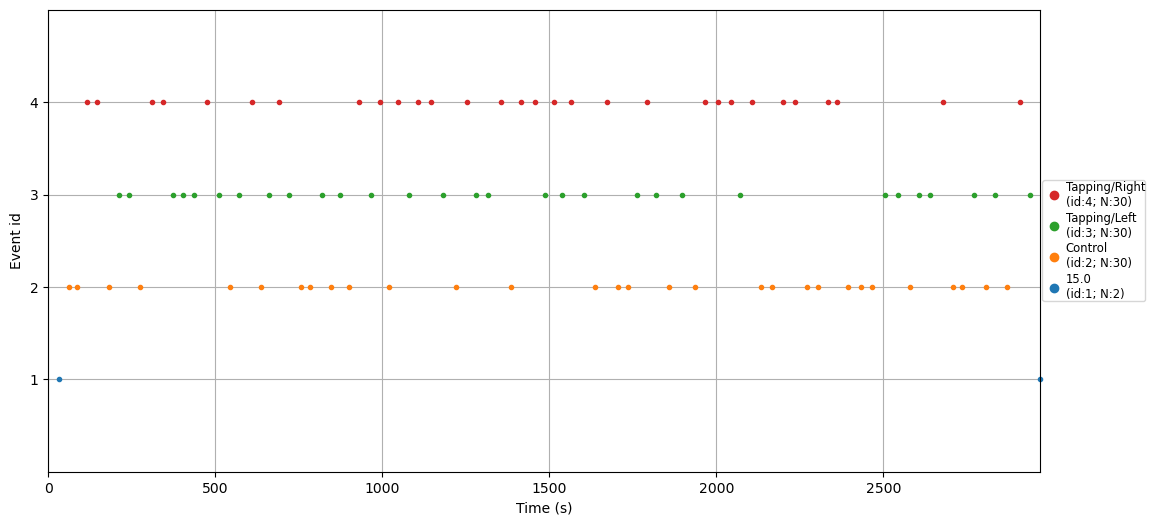

/var/folders/fs/672trg9x4018xs73pqyg8nh00000gn/T/ipykernel_1727/3079947329.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.7)


In [47]:
plt.rcParams["figure.figsize"] = (16,6)

fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw_haemo.info["sfreq"])
fig.subplots_adjust(right=0.7)

In [48]:
reject_crit = dict(hbo=80e-6)
tmin, tmax = -5, 15

epochs = mne.Epochs(raw_haemo, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, preload=True, 
                    reject=reject_crit, reject_by_annotation=True)

Not setting metadata
92 matching events found
Setting baseline interval to [-4.992, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 92 events and 157 original time points ...
1 bad epochs dropped


In [49]:
epochs

<Epochs | 91 events (all good), -4.992 – 14.976 s (baseline -4.992 – 0 s), ~4.4 MiB, data loaded,
 np.str_('15.0'): 1
 np.str_('Control'): 30
 np.str_('Tapping/Left'): 30
 np.str_('Tapping/Right'): 30>

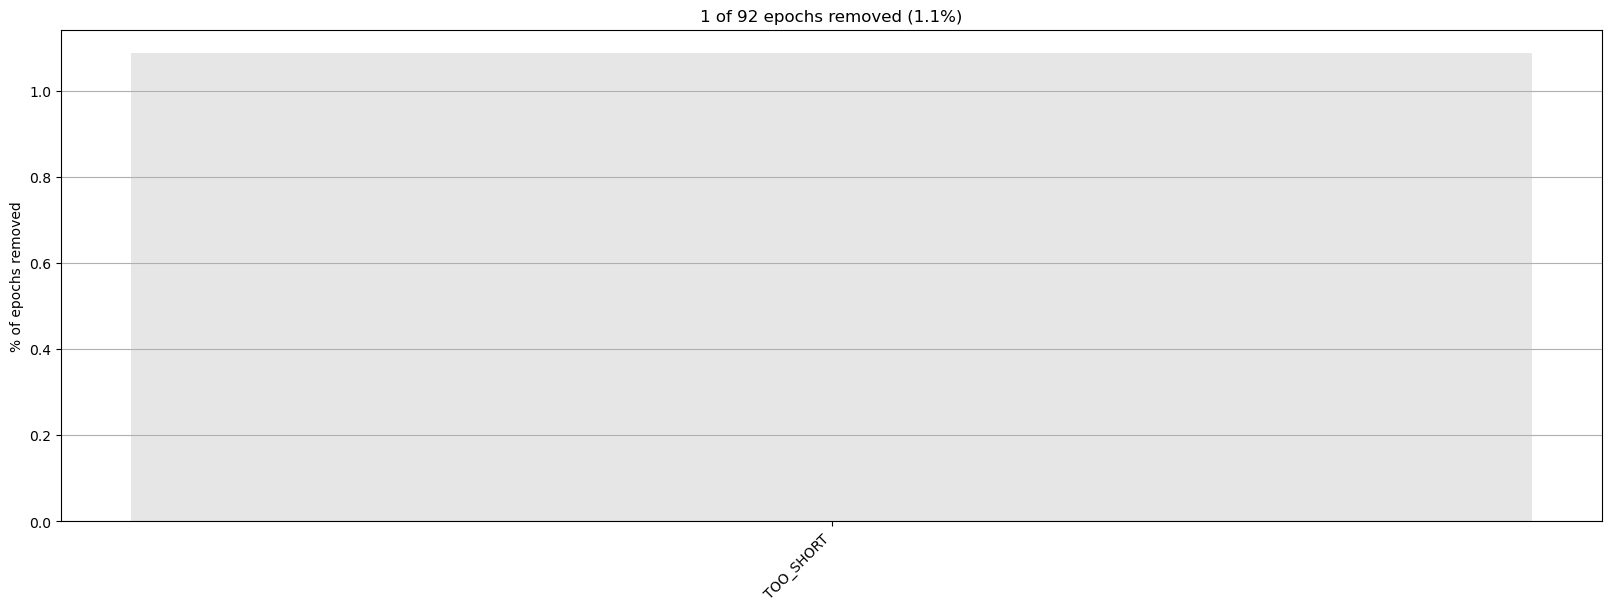

In [50]:
plt.rcParams["figure.figsize"] = (16,6)

epochs.plot_drop_log();

In [52]:
epochs["Tapping/Right"]

<Epochs | 30 events (all good), -4.992 – 14.976 s (baseline -4.992 – 0 s), ~1.5 MiB, data loaded,
 np.str_('Tapping/Right'): 30>

In [53]:
epochs["Tapping/Right"].average()

<Evoked | 'Tapping/Right' (average, N=30), -4.992 – 14.976 s, baseline -4.992 – 0 s, 40 ch, ~95 KiB>

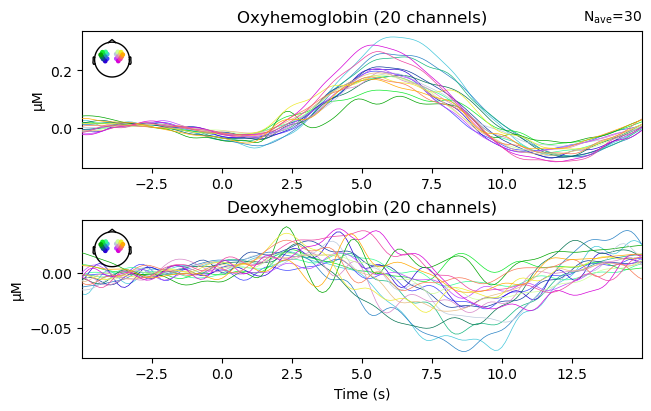

In [55]:
evoked = epochs["Tapping/Right"].average().plot();

In [59]:
evoked = epochs["Tapping/Left"].average()

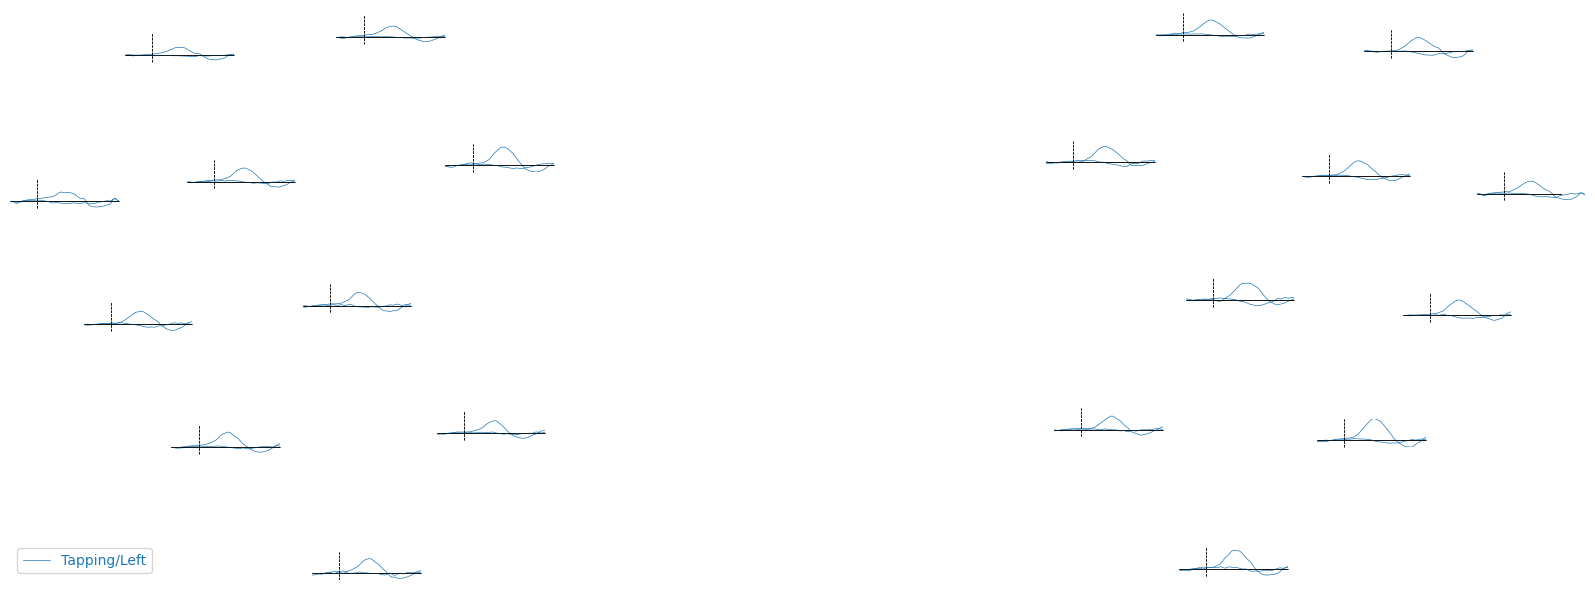

In [60]:
evoked.plot_topo();

No projector specified for this dataset. Please consider the method self.add_proj.


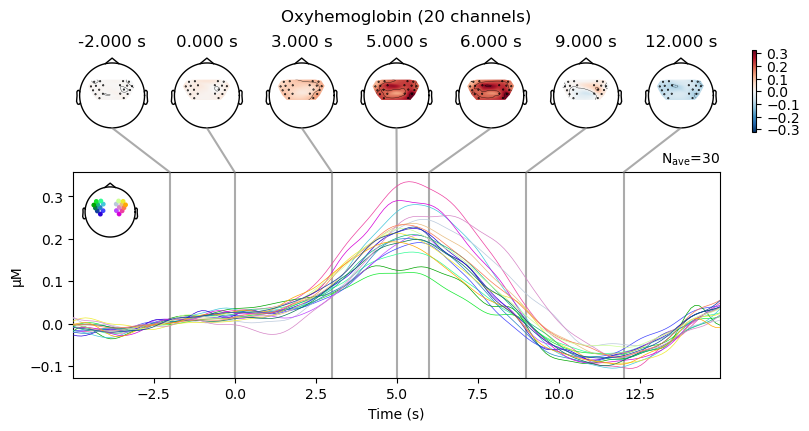

In [62]:
evoked.pick(picks="hbo").plot_joint(times=[-2, 0, 3, 5, 6, 9, 12], topomap_args=dict(extrapolate='local'));

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


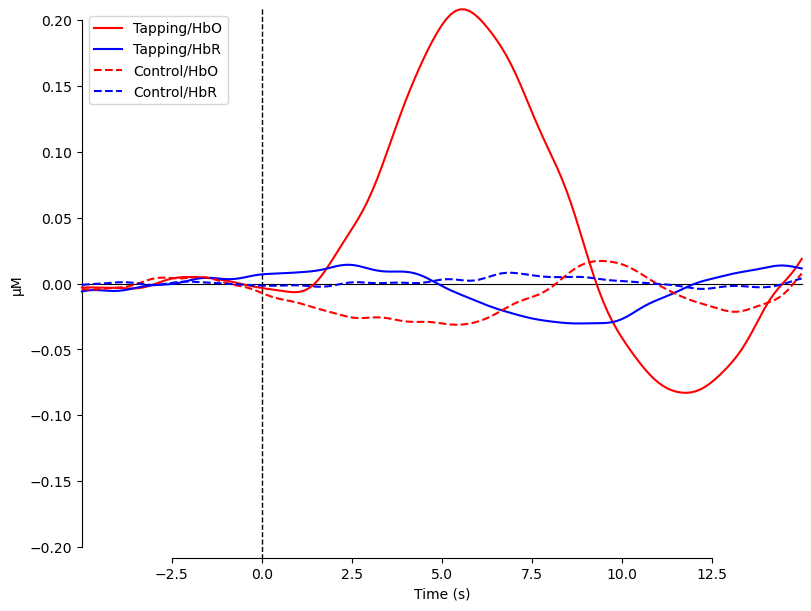

[<Figure size 800x600 with 1 Axes>]

In [64]:
evoked_dict = {'Tapping/HbO': epochs["Tapping"].average(picks="hbo"),
               'Tapping/HbR': epochs["Tapping"].average(picks="hbr"),
               'Control/HbO': epochs["Control"].average(picks="hbo"),
               'Control/HbR': epochs["Control"].average(picks="hbr")}

for cond in evoked_dict:
    evoked_dict[cond].rename_channels(lambda x : x[:-4])

color_dict = dict(HbO='r', HbR='b')
style_dict = dict(Control=dict(linestyle='dashed'))

mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", colors=color_dict, styles=style_dict)